# Classification with Keras

The objective of this notebook is to practice some classification tasks while focussing on the concept of **overfitting**.<br/>We want to deal with it through **Early Stopping Callbacks** and **Dropout Layers**.

## Definitions

**Early Stopping** is the fact of automatically stop training based on a loss condition on the `validation_data` passed during the `model.fit()` call.

**Dropout Layers** are layers that are added to the model and that allow to *turn off* neurons in the preceding layer during training to prevent overfitting. Each Dropout layer will *"drop"* or turn-off a user-defined percentage of neuron units in the previous layer every batch. This means that their weights and biases are not affected, just not taken into consideration.

## Step 1: Exploratory data analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_style('darkgrid')

In [2]:
sns.set_theme(palette='Set2')

In [3]:
df = pd.read_csv('data/cancer_classification.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [5]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


#### Countplot of the label

The first thing we can do is to give ourselves an idea of what classification ratio we are working with in our dataset.

<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

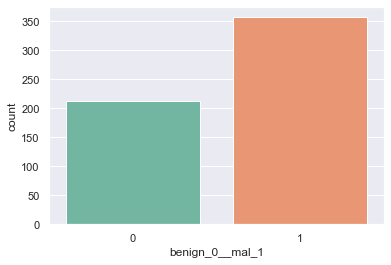

In [6]:
sns.countplot(x='benign_0__mal_1', data=df)

In [7]:
df.corr()['benign_0__mal_1'][:-1].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

<AxesSubplot:>

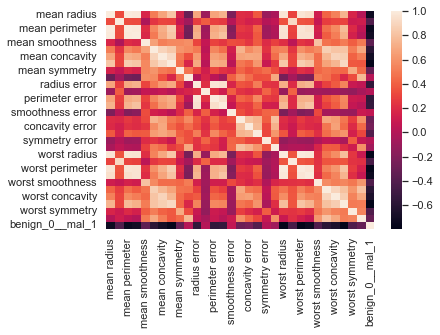

In [8]:
sns.heatmap(df.corr())

## Step 2: Preprocessing data

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()

In [14]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Step 3: Creating the model

Since we are working with a ***Classification problem***, we need to remember that the activation function on the output layer should be a *Sigmoid* function.

Moreover during the `model.compile` call we should set our loss function to `binary_crossentropy` as `mse` is for regression problems, not classification problems

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

2022-06-16 11:28:05.420245: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-16 11:28:05.420263: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [16]:
X_train.shape

(426, 30)

In [17]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

# Binary classification
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

2022-06-16 11:28:06.952170: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-16 11:28:06.952193: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-16 11:28:06.952212: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (nootaku-tuxedo): /proc/driver/nvidia/version does not exist
2022-06-16 11:28:06.952410: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


#### Overfitting

Since we want to focus on overfitting, we are going to fit the model over a ridiculously high amount of epochs.

This will allow us to see what overfitting looks like and how to deal with it.

In [18]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test))

Epoch 1/600
14/14 [==============================] - 1s 22ms/step - loss: 0.6418 - val_loss: 0.6222
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5948 - val_loss: 0.5770
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5457 - val_loss: 0.5262
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4934 - val_loss: 0.4741
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4414 - val_loss: 0.4239
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3943 - val_loss: 0.3764
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3529 - val_loss: 0.3361
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3204 - val_loss: 0.2996
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.2880 - val_loss: 0.2709
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.2641 - val_loss: 0.2454
Epoch 11

In [19]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

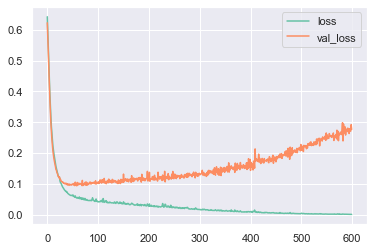

In [20]:
losses.plot()

This is a typical representation of an overfitting. At first both the training and validation loss are decreasing. This is good.

However, at a certain point in time our training loss keeps decreasing while our validation loss starts increasing. This is the sigh that we are overfitting our model to our training dataset.

#### Early Stopping

We will now try to use Keras' **callbacks** to stop the training when the first signs of overfitting appear.

In [21]:
# Create a new model
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

# Binary classification
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [22]:
# import the callbacks
from tensorflow.keras.callbacks import EarlyStopping

By using `help(EarlyStopping)` we can see that we need something to be monitored (in our case that would be the validation loss). We then define what the minimum change required to this monitored value is to be considered as an improvement and the patience, or number of epochs during which there is no improvement before the training will stop.

In [23]:
early_stop = EarlyStopping(
    monitor='val_loss',
    mode='min', # Can be 'min', 'max' or auto - max can be usefull for accuracy monitoring
    verbose=1,
    patience=25
)

In [24]:
model.fit(
    x=X_train,
    y=y_train,
    epochs=600,
    validation_data=(X_test, y_test),
    callbacks=[early_stop]
)

Epoch 1/600
14/14 [==============================] - 1s 12ms/step - loss: 0.6742 - val_loss: 0.6495
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6360 - val_loss: 0.6163
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6015 - val_loss: 0.5819
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5663 - val_loss: 0.5448
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5268 - val_loss: 0.5010
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4812 - val_loss: 0.4531
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4332 - val_loss: 0.4049
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3869 - val_loss: 0.3577
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3453 - val_loss: 0.3148
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3074 - val_loss: 0.2808
Epoch 11

Notice that the training has stopped after 72 epochs !

In [25]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

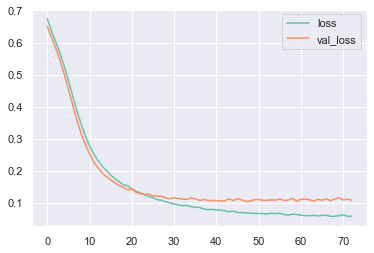

In [26]:
losses.plot()

#### Dropout Layers

Another way to prevent overfitting is to add **Dropout Layers**. Dropout Layers will "turn off" a percentage of neurons randomly.

In [28]:
# Create a new model
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(15, activation='relu'))
model.add(Dropout(rate=0.5))

# Binary classification
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [29]:
# Early stop is still active
model.fit(
    x=X_train,
    y=y_train,
    epochs=600,
    validation_data=(X_test, y_test),
    callbacks=[early_stop]
)

Epoch 1/600
14/14 [==============================] - 1s 13ms/step - loss: 0.6791 - val_loss: 0.6527
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6717 - val_loss: 0.6412
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6619 - val_loss: 0.6302
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6430 - val_loss: 0.6117
Epoch 5/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6281 - val_loss: 0.5923
Epoch 6/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6014 - val_loss: 0.5660
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5695 - val_loss: 0.5305
Epoch 8/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5635 - val_loss: 0.4970
Epoch 9/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5330 - val_loss: 0.4683
Epoch 10/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4939 - val_loss: 0.4321
Epoch 11

In [30]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

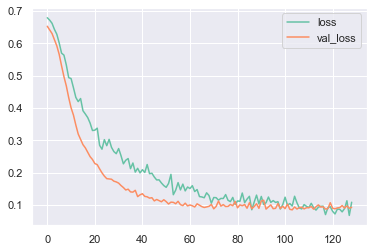

In [31]:
losses.plot()

## Step 4: Model evaluation

In [34]:
predictions = (model.predict(X_test) > 0.5)*1

5/5 [==============================] - 0s 4ms/step


In [35]:
from sklearn.metrics import classification_report, confusion_matrix

In [36]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [37]:
print(confusion_matrix(y_test, predictions))

[[54  1]
 [ 3 85]]
